In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('uci breast cancer dataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop(['id'], axis = 'columns')

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

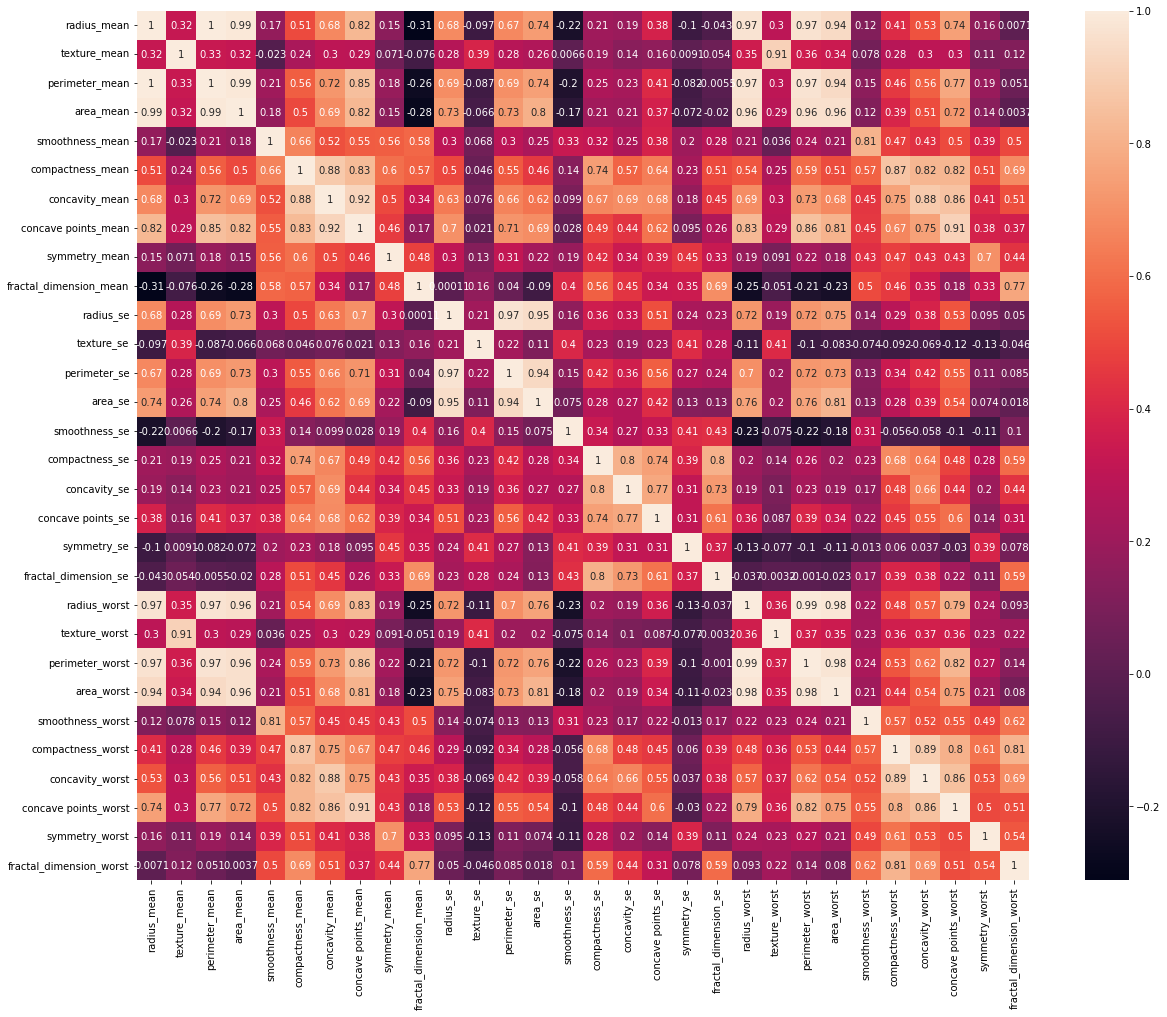

In [8]:
# correlation mapping:
plt.figure(figsize=(20,16))
sbn.heatmap(df.corr(), annot=True)

In [9]:
X = df.drop('diagnosis',axis=1)

In [10]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})
y = df[['diagnosis']]

In [12]:
y.head()

,diagnosis
0,0
1,0
2,0
3,0
4,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=42)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.62      1.00      0.77        89

    accuracy                           0.62       143
   macro avg       0.31      0.50      0.38       143
weighted avg       0.39      0.62      0.48       143

accuacy: 62.24 %


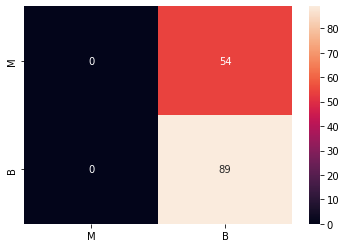

In [14]:
#Building a baseline dummy classifier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

class_name = ['M', 'B']
cmd = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=class_name, index=class_name)
sbn.heatmap(cmd, annot=True, fmt='d')
print(classification_report(y_test, y_pred))
print("accuacy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

accuacy: 96.50 %


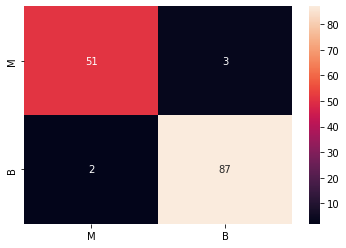

In [15]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

cmg = pd.DataFrame(confusion_matrix(y_test, y_pred_xgb), columns=class_name, index=class_name)
sbn.heatmap(cmg, annot=True, fmt='d')
print(classification_report(y_test, y_pred_xgb))
print("accuacy: {:.2f} %".format(accuracy_score(y_test, y_pred_xgb) * 100))

In [16]:
# Define the search space
param_grid = {
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7],
    "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [ 1, 3, 5, 7 ],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]
}
# Set up score
scoring = ['recall']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [17]:
# Define random search
random_search = RandomizedSearchCV(estimator=XGBClassifier(), 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='recall', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
rsv_result = random_search.fit(X_train, y_train)
# Print grid search summary
rsv_result
# Print the best score and the corresponding hyperparameters
print(f'The best score is {rsv_result.best_score_:.4f}')
print('The best score standard deviation is', round(rsv_result.cv_results_['std_test_recall'][rsv_result.best_index_], 4))
print(f'The best hyperparameters are {rsv_result.best_params_}')

The best score is 0.9851
The best score standard deviation is 0.0052
The best hyperparameters are {'reg_lambda': 10, 'reg_alpha': 1e-05, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.3, 'gamma': 0.0, 'colsample_bytree': 0.3}


              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.98      0.99      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

accuacy: 97.90 %


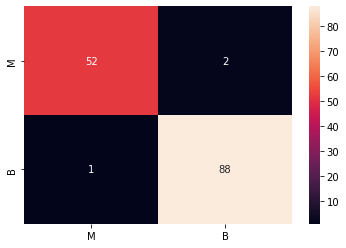

In [18]:
y_pred_rsv = random_search.predict(X_test)

cm_rsv = pd.DataFrame(confusion_matrix(y_test, y_pred_rsv), columns=class_name, index=class_name)
sbn.heatmap(cm_rsv, annot=True, fmt='d')
print(classification_report(y_test, y_pred_rsv))
print("accuacy: {:.2f} %".format(accuracy_score(y_test, y_pred_rsv) * 100))

In [19]:
# Define grid search
grid_search = GridSearchCV(estimator=XGBClassifier(), 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='recall', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, y_train)
# Print grid search summary
grid_result
# Print the best score and the corresponding hyperparameters
print(f'The best score is {grid_result.best_score_:.4f}')
print('The best score standard deviation is', round(grid_result.cv_results_['std_test_recall'][grid_result.best_index_], 4))
print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.9926
The best score standard deviation is 0.0105
The best hyperparameters are {'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.15, 'max_depth': 4, 'min_child_weight': 1, 'reg_alpha': 1e-05, 'reg_lambda': 0.1}


              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.98      0.99      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

accuacy: 97.90 %


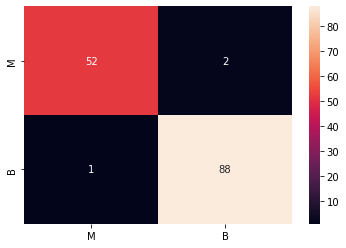

In [20]:
y_pred_grid = grid_search.predict(X_test)

cm_grid = pd.DataFrame(confusion_matrix(y_test, y_pred_grid), columns=class_name, index=class_name)
sbn.heatmap(cm_grid, annot=True, fmt='d')
print(classification_report(y_test, y_pred_grid))
print("accuacy: {:.2f} %".format(accuracy_score(y_test, y_pred_grid) * 100))